# Convolutional Autoencoder for Anomaly Detection

### Imports

In [1]:
from torchsummary import summary
import matplotlib.pyplot as plt
import torch
import os

### Import utility functions

In [2]:
#from helper_train import train_vae, loss_mse
from helper_plotting import plot_generated_images
from helper_datasets import CustomDataset
from helper_utils import load_data, train_model
from helper_conAutoencoder import CAE, AE
from helper_train import Trainer

### Model Hyperparameters

In [3]:
# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#torch.cuda.is_available()
#!python -c "import torch; print(torch.cuda.is_available())"
torch.cuda.empty_cache()
print('Device:', device)

RANDOM_SEED = 123
data_class = "ksdd1-rect"
size = 512
# Hyperparameters
hyperParams = {'LEARNING_RATE': 1e-3,
            'NUM_EPOCHS':80,
            'DATA_CLASS': "ksdd1-rect",
            'IMAGE_SIZE': [1024,512],
              'VERSION': "size_1024_512_latent_512_v1"}
params = {'batch_size': 12,
         'shuffle' : True,
         'num_workers' : 10}

Device: cuda


In [4]:
hyperParams['IMAGE_SIZE']

[1024, 512]

In [5]:
DATASET_PATH = r'/home/jovyan/work/Project/USL-AD-EVAL/data/combined/'#/ksdd1-rect/train/good'
#os.listdir(DATASET_PATH)
#train_dataLoader, valid_dataLoader, test_dataLoader = load_data(data_class, size, params)

### Prepare the paths for loading the images

###  Autoencoder

Let x and z denote the observation and latent variable respectively in the following descriptions.

#### Encoder network
This defines the approximate posterior distribution q(z|x), which takes as input an observation and outputs a set of parameters for specifying the conditional distribution of the latent representation z. In this example, simply model the distribution as a diagonal Gaussian, and the network outputs the mean and log-variance parameters of a factorized Gaussian. Output log-variance instead of the variance directly for numerical stability.

#### Decoder network
This defines the conditional distribution of the observation p(x|z), which takes a latent sample z as input and outputs the parameters for a conditional distribution of the observation. Model the latent distribution prior p(z) as a unit Gaussian.

### Summary of Model

In [6]:
model = CAE(latent_dim=512)
#model = AE()
model = model.to(device)
summary(model=model,
        input_size=(1,1024,512))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 8, 1024, 512]              16
            Conv2d-2         [-1, 16, 512, 256]           1,168
       BatchNorm2d-3         [-1, 16, 512, 256]              32
         LeakyReLU-4         [-1, 16, 512, 256]               0
            Conv2d-5          [-1, 8, 512, 256]             136
            Conv2d-6         [-1, 32, 256, 128]           2,336
       BatchNorm2d-7         [-1, 32, 256, 128]              64
         LeakyReLU-8         [-1, 32, 256, 128]               0
            Conv2d-9          [-1, 8, 256, 128]             264
           Conv2d-10          [-1, 64, 128, 64]           4,672
      BatchNorm2d-11          [-1, 64, 128, 64]             128
        LeakyReLU-12          [-1, 64, 128, 64]               0
           Conv2d-13           [-1, 8, 128, 64]             520
           Conv2d-14          [-1, 128,

#### Import some helper function

* The Autoencoder is trained on small parts of images using a dataset, the Adam optimizer, and the mean squared error loss function. 
* Now model is trained by averaging the reconstruction errors for each full image instead of keeping the reconstruction errors for each small part. we're computing the loss for the full image by averaging the reconstruction errors for each small part of the image. This will give a single loss value for each full image, which can be used to update the model's parameters via backpropagation.

### Import image using Custom DataLoader 

### Training 

In [7]:
cae_trainer = Trainer(model, hyperParams=hyperParams, DataLoderParams=params)

loaded 294 images for training
loaded 35 images for validation
loaded 36 images for testing


[1/80] Train-loss: 3201644.920 Val-loss: 2583784.667
Time elapsed: 0.06 min
[2/80] Train-loss: 3021654.000 Val-loss: 2492040.167
[3/80] Train-loss: 2934675.400 Val-loss: 2416987.500
[4/80] Train-loss: 2842219.680 Val-loss: 2365137.333


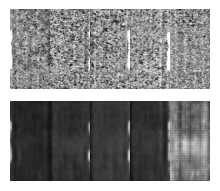

[5/80] Train-loss: 2746308.480 Val-loss: 2305440.250
Time elapsed: 0.29 min
[6/80] Train-loss: 2674108.510 Val-loss: 2279012.542
[7/80] Train-loss: 2610925.680 Val-loss: 2215724.125
[8/80] Train-loss: 2558513.520 Val-loss: 2155959.417
[9/80] Train-loss: 2510476.470 Val-loss: 2121714.750
Time elapsed: 0.52 min


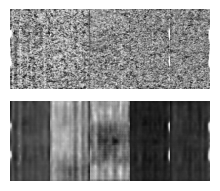

[10/80] Train-loss: 2460554.010 Val-loss: 2075414.917
[11/80] Train-loss: 2415969.770 Val-loss: 2034338.625
[12/80] Train-loss: 2378115.480 Val-loss: 1995594.292
[13/80] Train-loss: 2343157.045 Val-loss: 1963368.083
Time elapsed: 0.76 min
[14/80] Train-loss: 2295160.355 Val-loss: 1932593.417


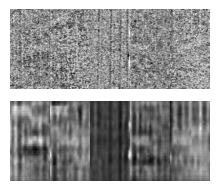

[15/80] Train-loss: 2251016.485 Val-loss: 1899788.000
[16/80] Train-loss: 2224247.960 Val-loss: 1867218.583
[17/80] Train-loss: 2199777.960 Val-loss: 1843221.542
Time elapsed: 1.00 min
[18/80] Train-loss: 2159231.285 Val-loss: 1830171.833
[19/80] Train-loss: 2130513.475 Val-loss: 1790445.500


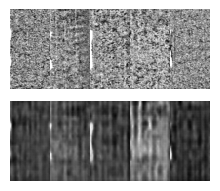

[20/80] Train-loss: 2110610.220 Val-loss: 1768711.250
[21/80] Train-loss: 2084921.495 Val-loss: 1752051.250
Time elapsed: 1.23 min
[22/80] Train-loss: 2056679.430 Val-loss: 1727696.375
[23/80] Train-loss: 2027208.870 Val-loss: 1710515.500
[24/80] Train-loss: 2005112.865 Val-loss: 1697094.292


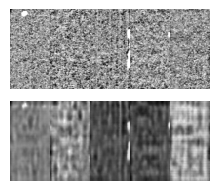

[25/80] Train-loss: 1984592.850 Val-loss: 1670789.875
Time elapsed: 1.47 min
[26/80] Train-loss: 1957662.420 Val-loss: 1656045.250
[27/80] Train-loss: 1940610.350 Val-loss: 1640568.000
[28/80] Train-loss: 1924073.115 Val-loss: 1623777.708
[29/80] Train-loss: 1895819.735 Val-loss: 1610990.792
Time elapsed: 1.70 min


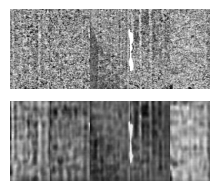

[30/80] Train-loss: 1882186.550 Val-loss: 1590270.958
[31/80] Train-loss: 1858984.835 Val-loss: 1573720.958
[32/80] Train-loss: 1854490.555 Val-loss: 1569979.708
[33/80] Train-loss: 1833800.340 Val-loss: 1551834.250
Time elapsed: 1.95 min
[34/80] Train-loss: 1819536.710 Val-loss: 1545012.875


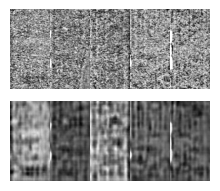

[35/80] Train-loss: 1802861.700 Val-loss: 1531784.083
[36/80] Train-loss: 1789773.750 Val-loss: 1528203.708
[37/80] Train-loss: 1771544.940 Val-loss: 1511705.167
Time elapsed: 2.19 min
[38/80] Train-loss: 1758005.100 Val-loss: 1495671.250
[39/80] Train-loss: 1748361.165 Val-loss: 1481430.083


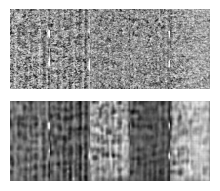

[40/80] Train-loss: 1737744.435 Val-loss: 1483425.958
[41/80] Train-loss: 1723647.730 Val-loss: 1490412.917
Time elapsed: 2.43 min
[42/80] Train-loss: 1708512.740 Val-loss: 1466777.167
[43/80] Train-loss: 1702206.940 Val-loss: 1457325.500
[44/80] Train-loss: 1692803.550 Val-loss: 1446190.250


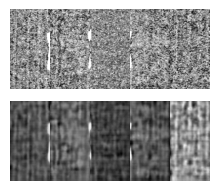

[45/80] Train-loss: 1679973.185 Val-loss: 1446425.708
Time elapsed: 2.67 min
[46/80] Train-loss: 1667511.765 Val-loss: 1441073.083
[47/80] Train-loss: 1666427.020 Val-loss: 1433698.250
[48/80] Train-loss: 1656675.665 Val-loss: 1432306.500
[49/80] Train-loss: 1644539.670 Val-loss: 1426875.833
Time elapsed: 2.91 min


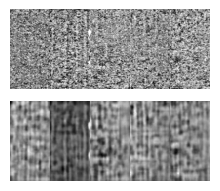

[50/80] Train-loss: 1639520.150 Val-loss: 1417559.792
[51/80] Train-loss: 1627263.635 Val-loss: 1419852.125
[52/80] Train-loss: 1627115.135 Val-loss: 1412795.625
[53/80] Train-loss: 1624261.490 Val-loss: 1408004.125
Time elapsed: 3.15 min
[54/80] Train-loss: 1613945.770 Val-loss: 1404420.875


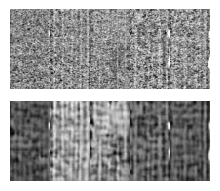

[55/80] Train-loss: 1607324.155 Val-loss: 1400003.083
[56/80] Train-loss: 1601000.720 Val-loss: 1397333.042
[57/80] Train-loss: 1592288.815 Val-loss: 1396857.333
Time elapsed: 3.39 min
[58/80] Train-loss: 1587332.580 Val-loss: 1395885.917
[59/80] Train-loss: 1582173.440 Val-loss: 1393077.417


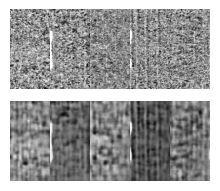

[60/80] Train-loss: 1575975.595 Val-loss: 1388043.042
[61/80] Train-loss: 1570577.710 Val-loss: 1391635.833
Time elapsed: 3.63 min
[62/80] Train-loss: 1564273.475 Val-loss: 1398027.083
[63/80] Train-loss: 1566874.295 Val-loss: 1397112.458
[64/80] Train-loss: 1562124.870 Val-loss: 1386993.167


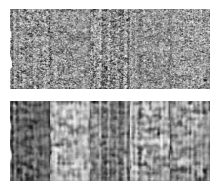

[65/80] Train-loss: 1553337.195 Val-loss: 1390402.917
Time elapsed: 3.87 min
[66/80] Train-loss: 1549117.765 Val-loss: 1386178.958
[67/80] Train-loss: 1543527.515 Val-loss: 1393156.833
[68/80] Train-loss: 1545185.070 Val-loss: 1397616.375
[69/80] Train-loss: 1541527.885 Val-loss: 1390498.833
Time elapsed: 4.11 min


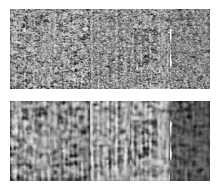

[70/80] Train-loss: 1541466.965 Val-loss: 1392824.417
[71/80] Train-loss: 1536818.010 Val-loss: 1389805.167
[72/80] Train-loss: 1534602.070 Val-loss: 1390415.000
Epoch 00072: reducing learning rate of group 0 to 1.0000e-05.
[73/80] Train-loss: 1529928.745 Val-loss: 1390010.292
Time elapsed: 4.36 min
[74/80] Train-loss: 1519881.815 Val-loss: 1387384.708


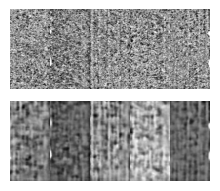

[75/80] Train-loss: 1520919.495 Val-loss: 1379799.917
[76/80] Train-loss: 1520013.160 Val-loss: 1380968.792
[77/80] Train-loss: 1522658.925 Val-loss: 1384294.417
Time elapsed: 4.60 min
[78/80] Train-loss: 1516430.615 Val-loss: 1389177.625
[79/80] Train-loss: 1518685.915 Val-loss: 1385639.417


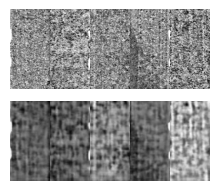

[80/80] Train-loss: 1511528.645 Val-loss: 1384627.958
Total Training Time: 4.79 min


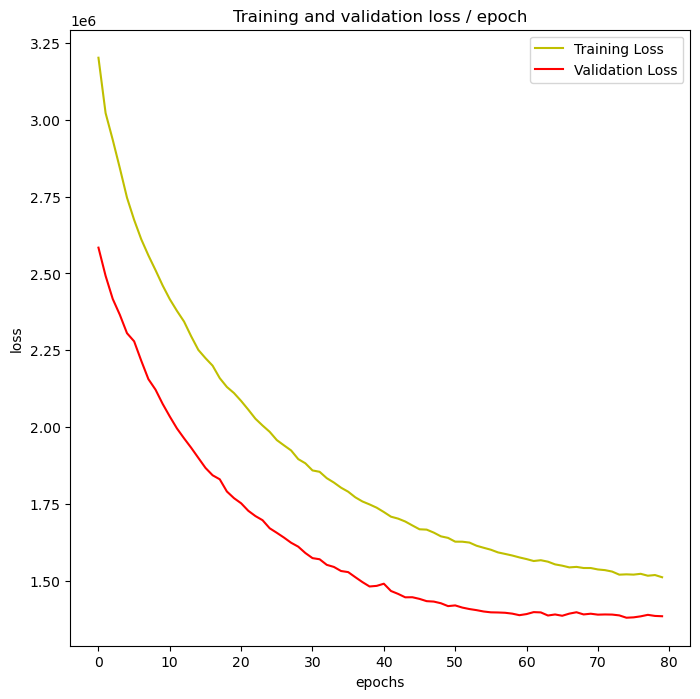

In [8]:
cae_trainer.train()

### Save model's trained Weight and bias and load it

In [9]:
cae_trainer.save_model()
#cae_gkd_trainer.load_model(version="v3")

### Show the reconstructed images

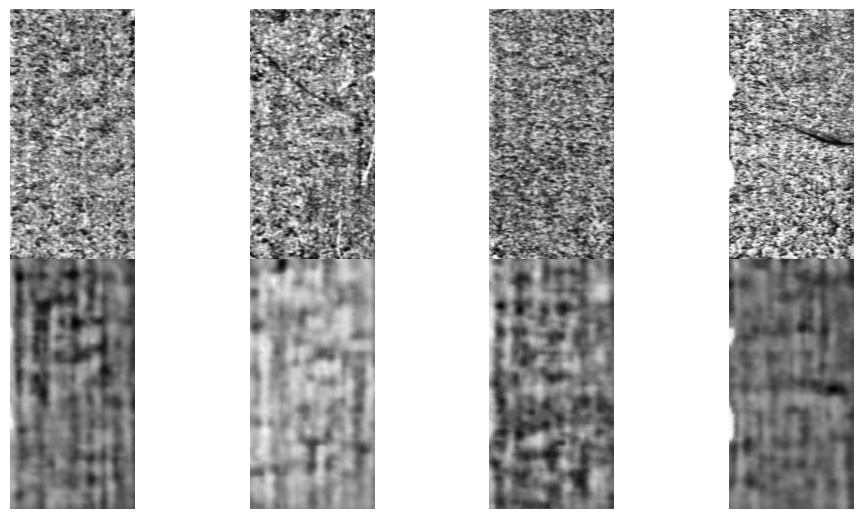

In [10]:
#unnormalizer = UnNormalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
test_dataLoader = cae_trainer.test_dataLoader
plot_generated_images(data_loader=test_dataLoader,
                      model=model,
                      #unnormalizer=unnormalizer,
                      device=device,
                      n_images = 4,
                      modeltype='CAE') 

### Calculate the threshold in validation datasets

In [11]:
cae_trainer.compute_train_outputs()

Mean traing recon. error: 1564979.625


In [12]:
cae_trainer.compute_test_outputs()

Mean test recon. error anom: 1766400.25
Mean test recon. error good: 1429765.75


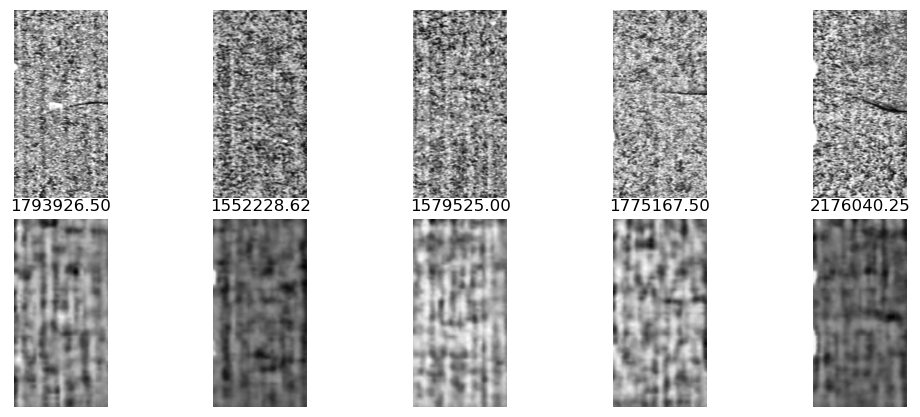

In [13]:
cae_trainer.inspect(mode= 'test')

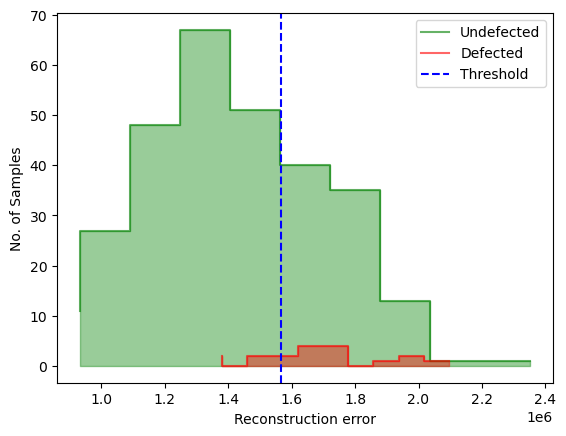

In [14]:
cae_trainer.show_error_distribution()

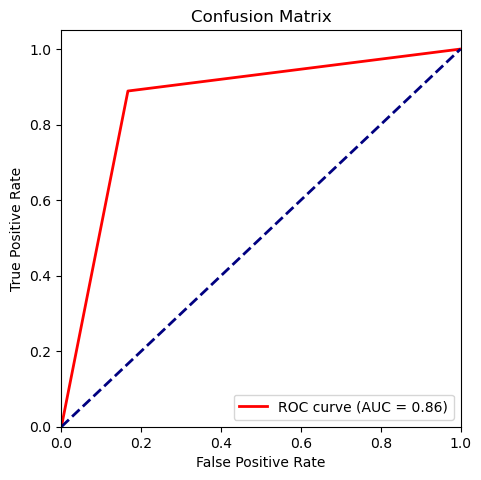

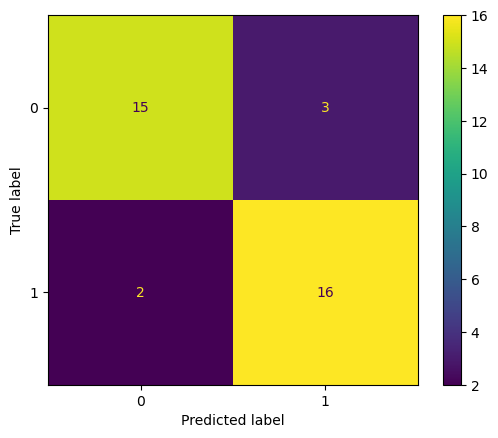

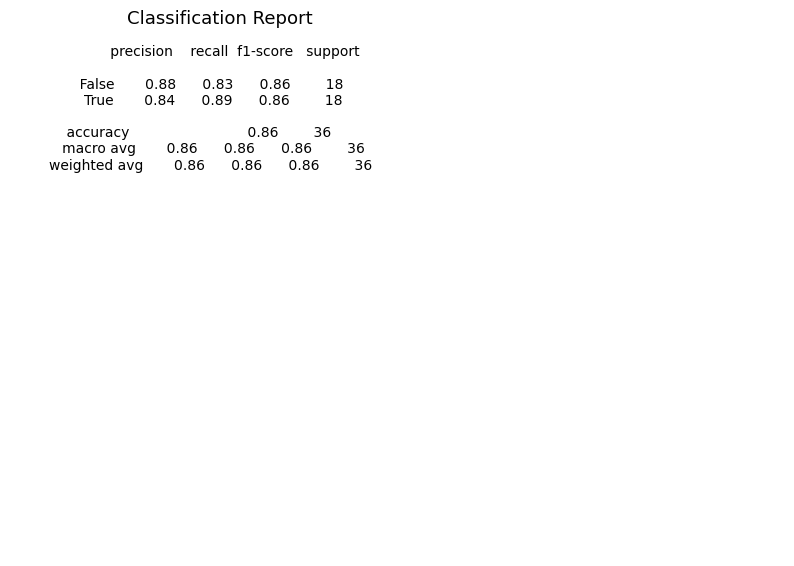

In [15]:
cae_trainer.evaluate_ae()